In [ ]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [ ]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "test1"

data_method = "eval_single"
eval_method = "eval_single"

scene = "mid_gate"

courses = [
    "traverse"
    ]   

roster = [
    "Maverick"
    ]

deployment = (cohort,courses[0],scene,eval_method)

In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method,Nro_ds=20)

# # Review the Rollout Data
# ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

In [ ]:
# # Train the Policy
tp.train_roster(cohort,roster,"histNet",10)

pl.plot_losses(cohort,roster,"histNet",use_log=True)

Using existing observation data...

Output()

======================================================================
Cohort : test1          Network: commNet
======================================================================
----------------------------------------------------------------------
Student: Maverick   | Epochs: 10    | Data Size: 320.0/320.0                  
Time: 0h 0m 2s      | Train: 0.0739 | Test: 0.0723
======================================================================

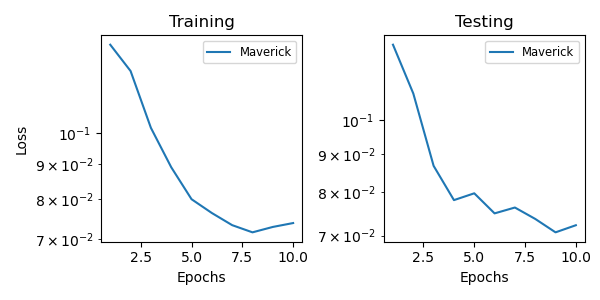

In [8]:
# Train the Policy
tp.train_roster(cohort,roster,"commNet",10,lim_sv=50)

pl.plot_losses(cohort,roster,"commNet",use_log=True)